# Análisis Exploratirio de Datos (EDA) - Analisis Bivariado

<a id = "table-of-content"></a>

## Tabla de contenido

1. [Gráfica de puntos](#points)
2. [Gráfico de Violín y BoxPlots](#violinplot)
3. [Matrices de Correlación](#corrmatrix)
4. [Regresión Simple](#simpleregresion)

## 1. Importando librerias necesarias (Previa instalación)

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

/home/codespace/.python/current/lib/python3.10/site-packages/palmerpenguins/penguins.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


## 2. Tomando los datos de la libreria de palmerpenguins

In [3]:
preprocess_penguins_df = palmerpenguins.load_penguins()

processed_penguins_df = preprocess_penguins_df.dropna()
processed_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


<a id ="points"></a>

## 3. Estableciendo relaciones: Gráfica de puntos

[Tabla de contenido](#table-of-content)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

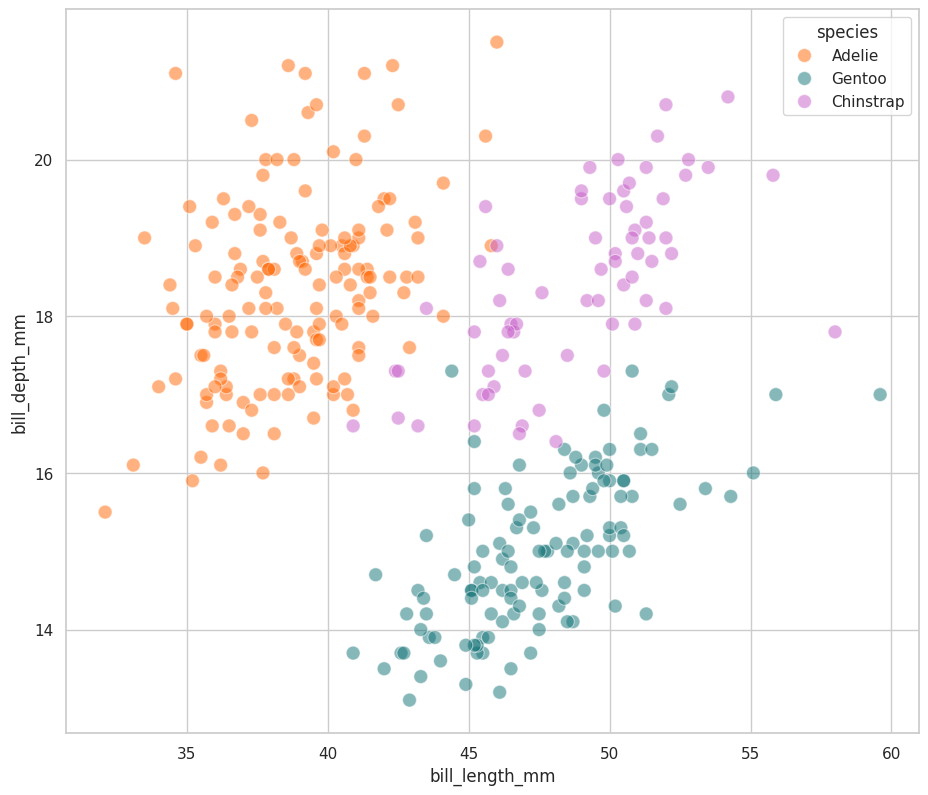

In [8]:
sns.scatterplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue='species',
    alpha = 1/2,
    palette=penguin_color,
    s = 100
)

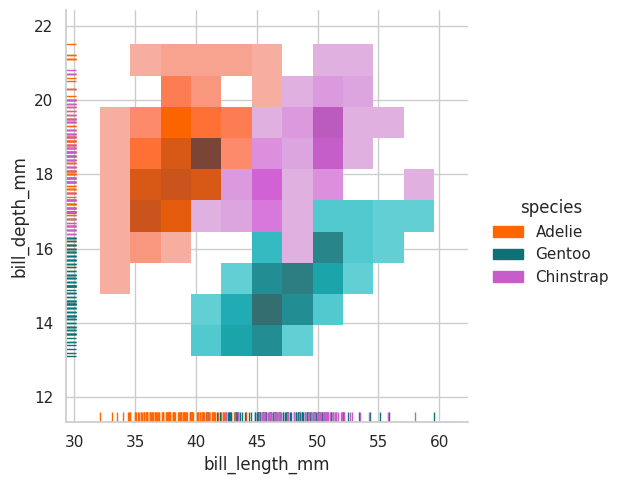

In [11]:
sns.displot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug=True,
    hue='species',
    palette=penguin_color
)

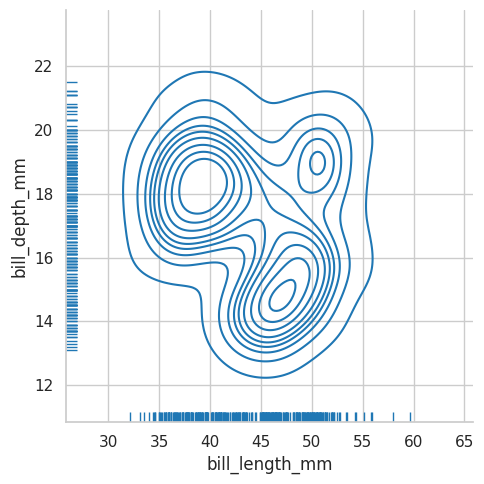

In [13]:
sns.displot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug=True,
    kind = 'kde'
)

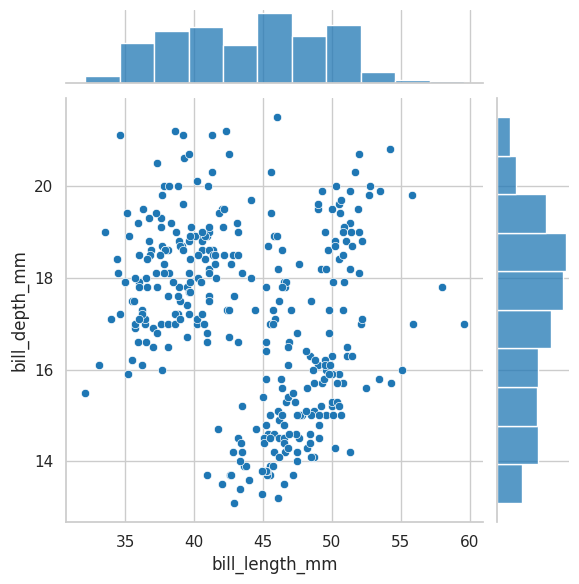

In [14]:
sns.jointplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

<a id ="violinplot"></a>

## 4. Gráfico de Violín y BoxPlots

[Tabla de contenido](#table-of-content)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

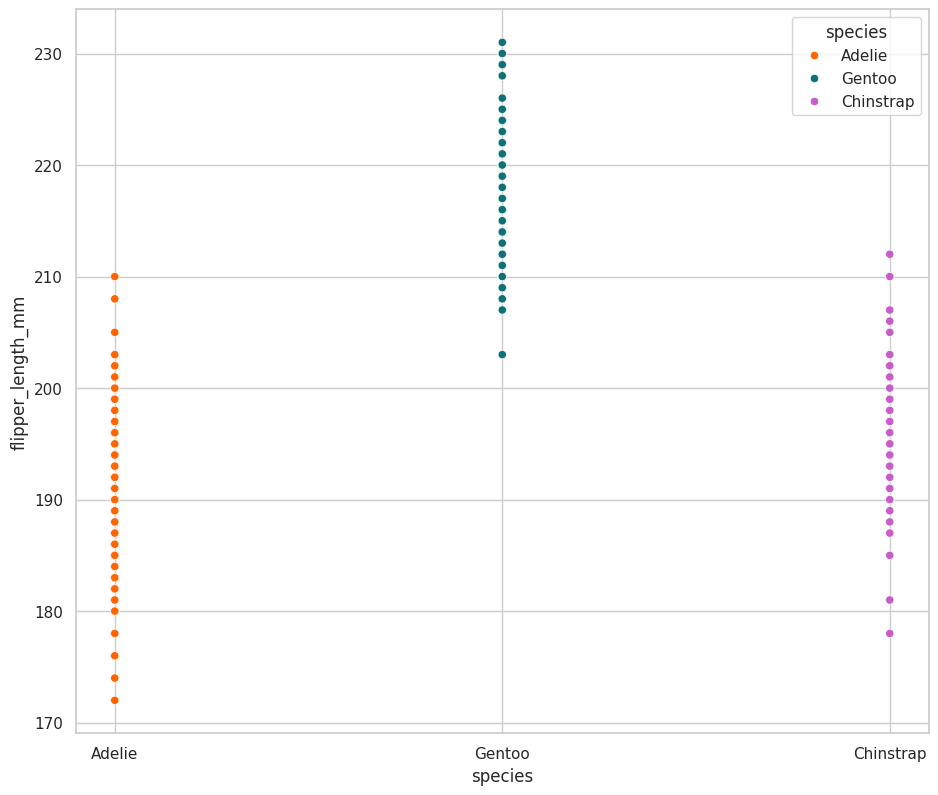

In [16]:
sns.scatterplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

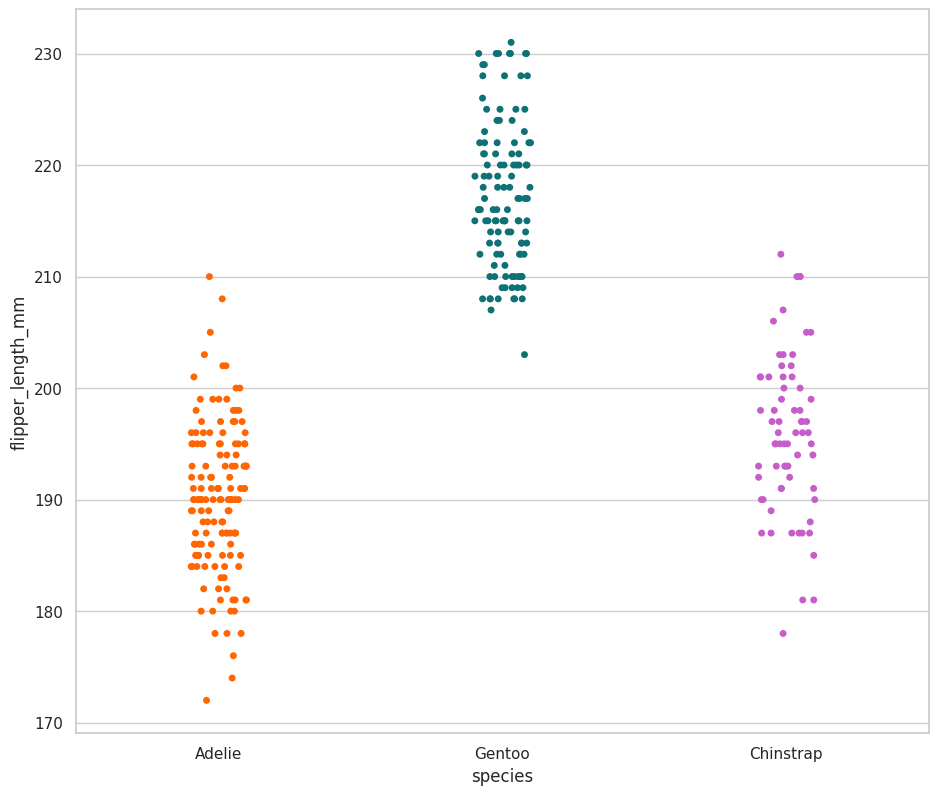

In [18]:
sns.stripplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette=penguin_color
)

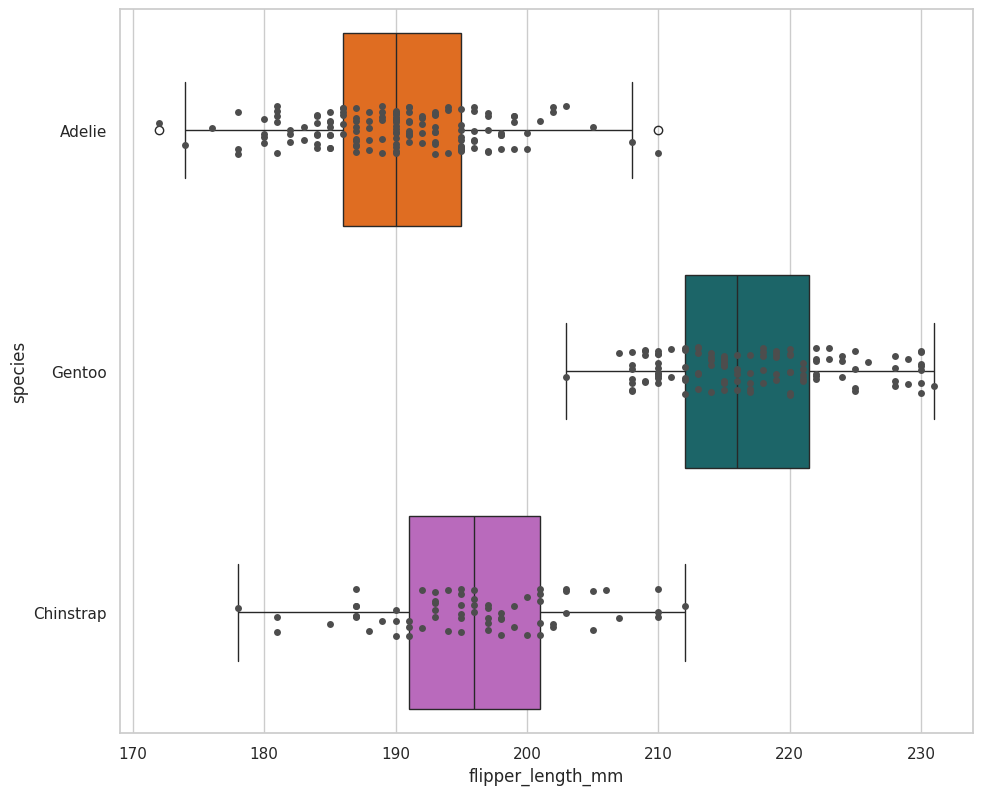

In [21]:
ax = sns.boxplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    y = 'species',
    hue = 'species',
    palette=penguin_color
)

ax = sns.stripplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    y = 'species',
    color = '.3'
)

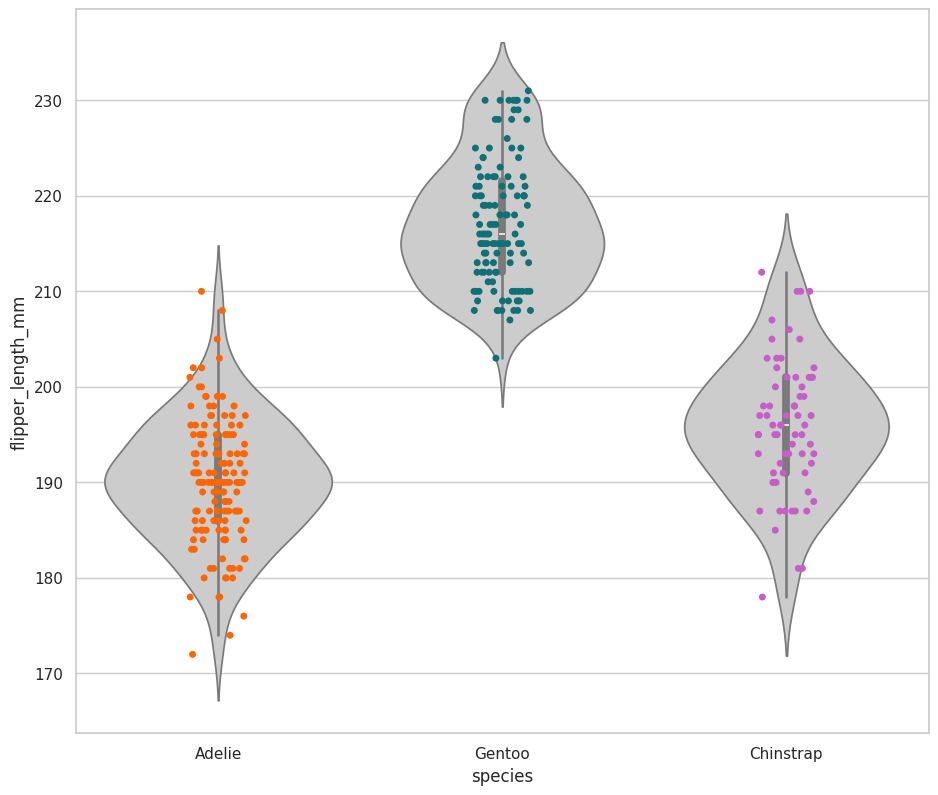

In [24]:
ax = sns.violinplot(
    data = processed_penguins_df,
    y = 'flipper_length_mm',
    x = 'species',
    color = '.8'
)

ax = sns.stripplot(
    data = processed_penguins_df,
    y = 'flipper_length_mm',
    x = 'species',
    hue = 'species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

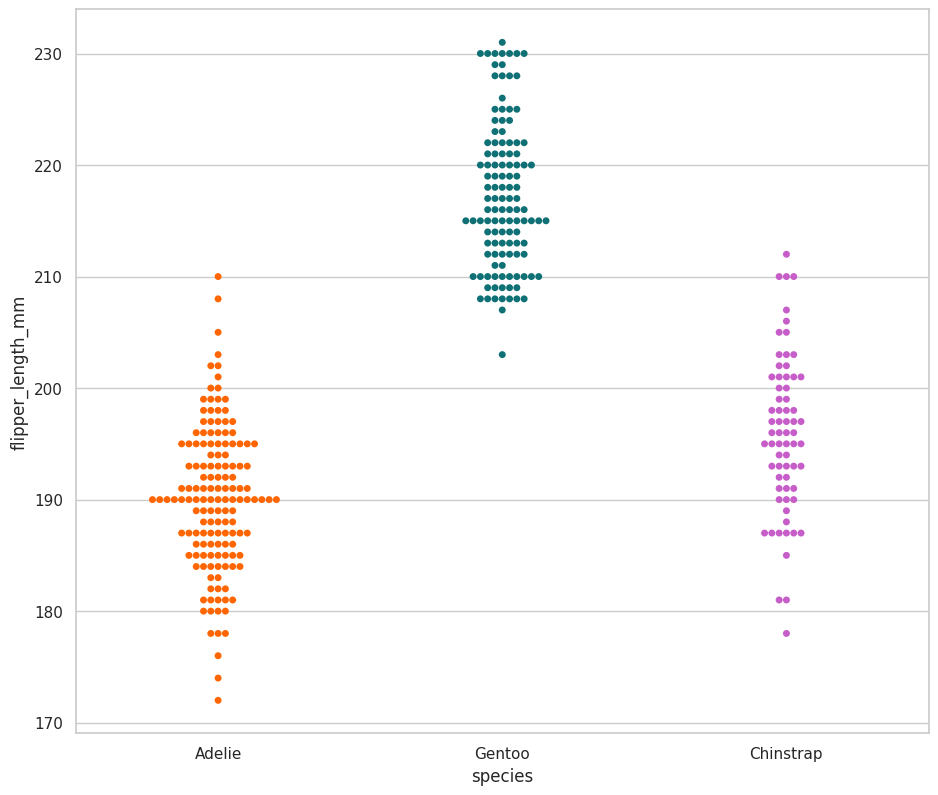

In [26]:
sns.swarmplot(
    data = processed_penguins_df,
    x = 'species',
    y = 'flipper_length_mm',
    hue = 'species',
    palette = penguin_color
)

<a id ="corrmatrix"></a>

## 5. Matrices de Correlación

[Tabla de contenido](#table-of-content)

Se utiliza el coeficiente de pierce. Yendo de 1 a -1. Si es 0 o cercano a 0 no existe correlación entre las variables. Este sirve para correlaciones de tipo lineales. La correlación no implica causalidad.

In [28]:
processed_penguins_df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


### Visualizando la matriz de correlación

<Axes: >

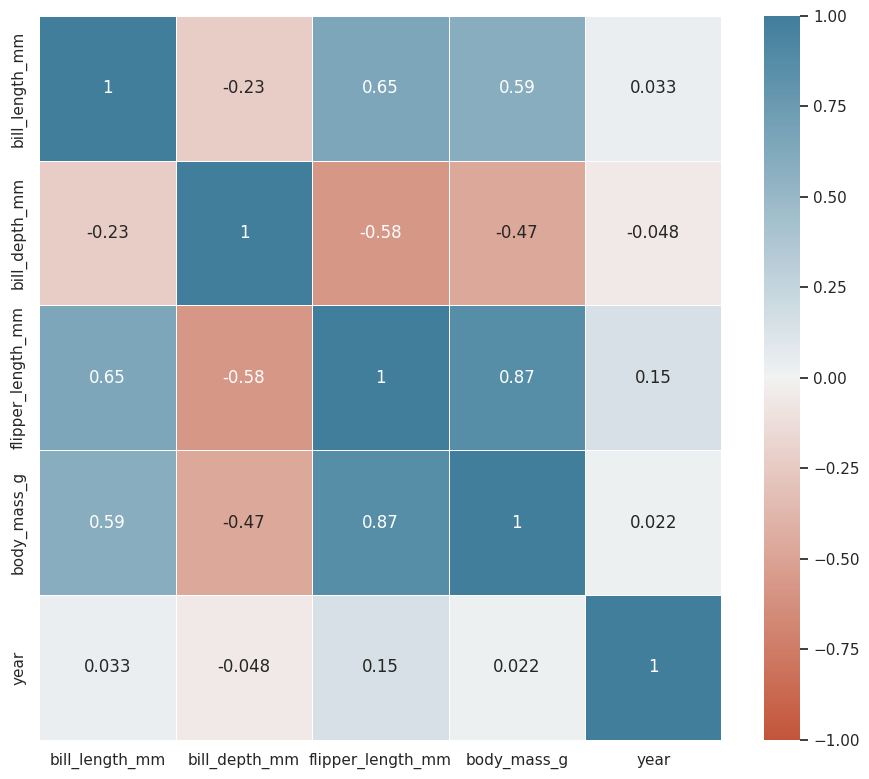

In [30]:
sns.heatmap(
    data = processed_penguins_df.corr(numeric_only = True),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin = -1,
    vmax=1,
    linewidths=0.5,
    annot = True
)

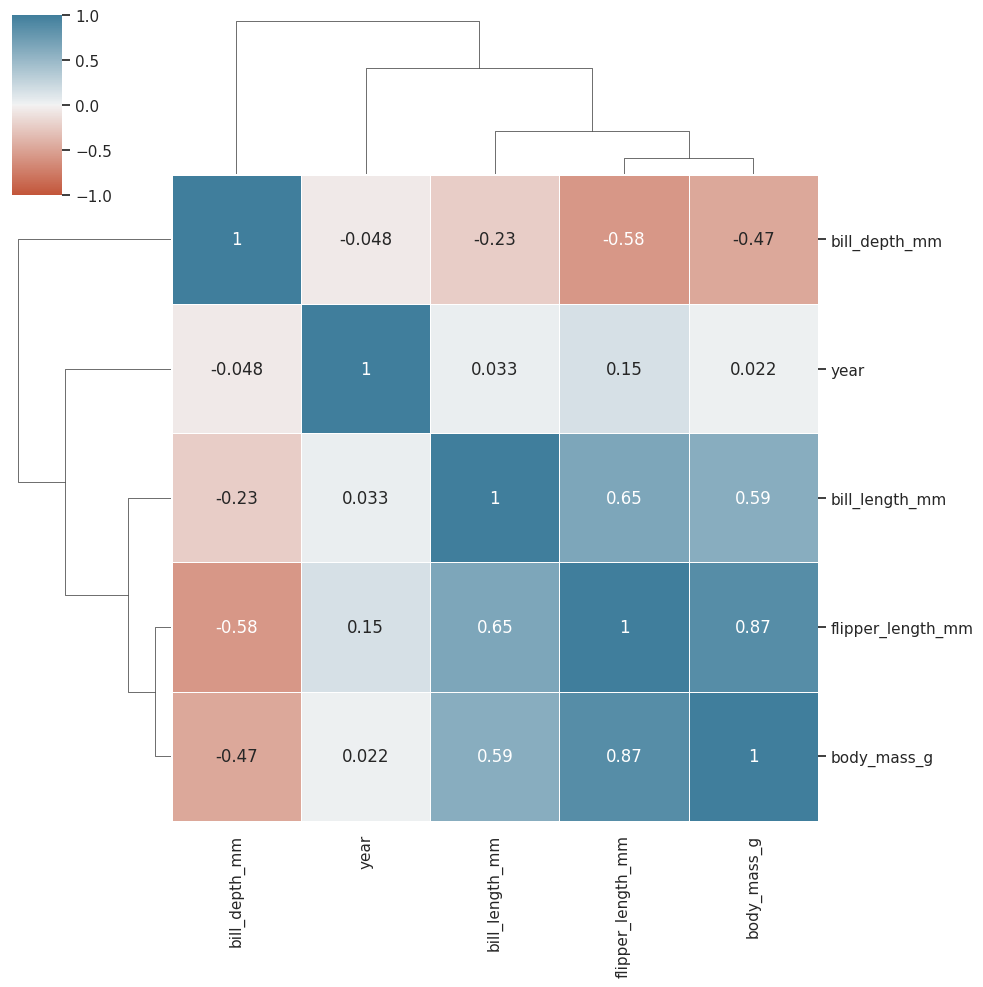

In [31]:
sns.clustermap(
    data = processed_penguins_df.corr(numeric_only = True),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin = -1,
    vmax=1,
    linewidths=0.5,
    annot = True
)

### Tratando varianbles categoricas

In [32]:
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0,1])
    )
)

/tmp/ipykernel_3146/1586565767.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_sex = lambda df: df.sex.replace(['female', 'male'], [0,1])


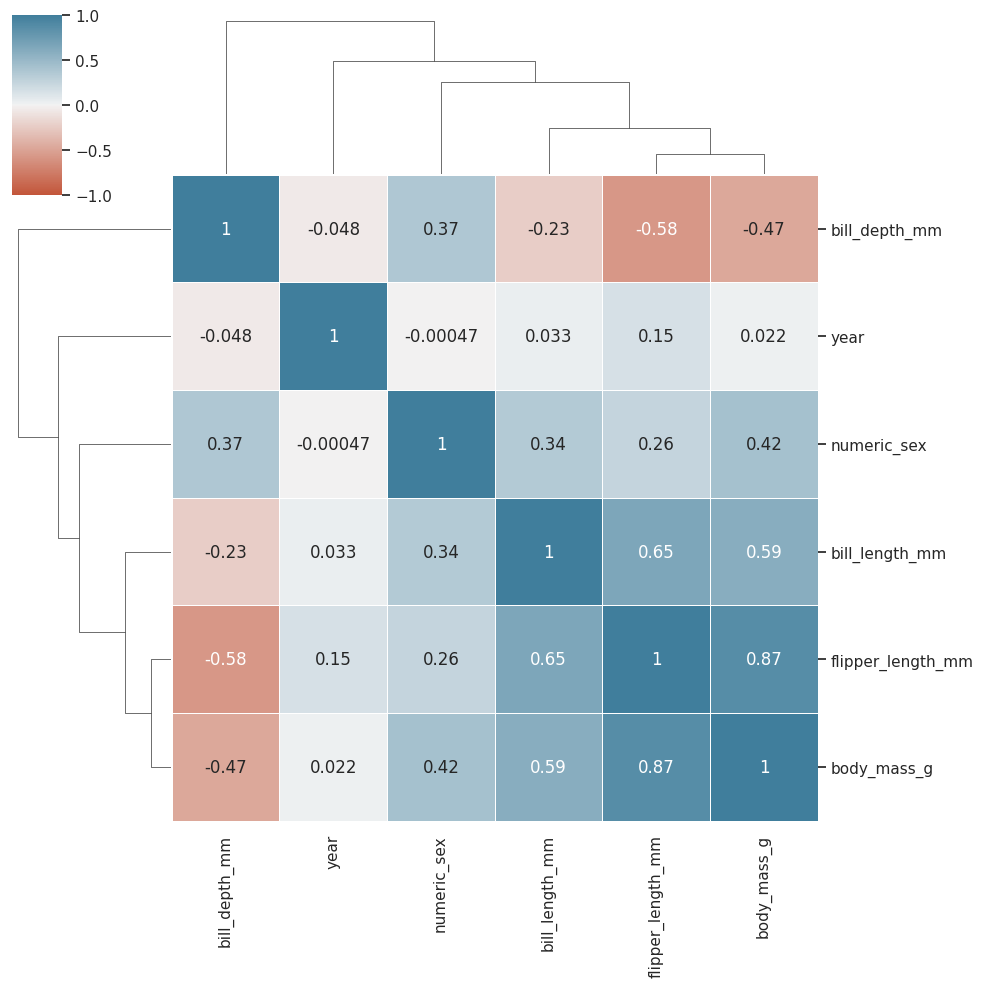

In [33]:
sns.clustermap(
    data = processed_penguins_df.corr(numeric_only = True),
    cmap = sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin = -1,
    vmax=1,
    linewidths=0.5,
    annot = True
)

### Limitantes del coeficiente de relación

Este solo nos ayuda a determinar una posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación

<a id ="simpleregresion"></a>

## 6. Análisis de regresión simple

[Tabla de contenido](#table-of-content)

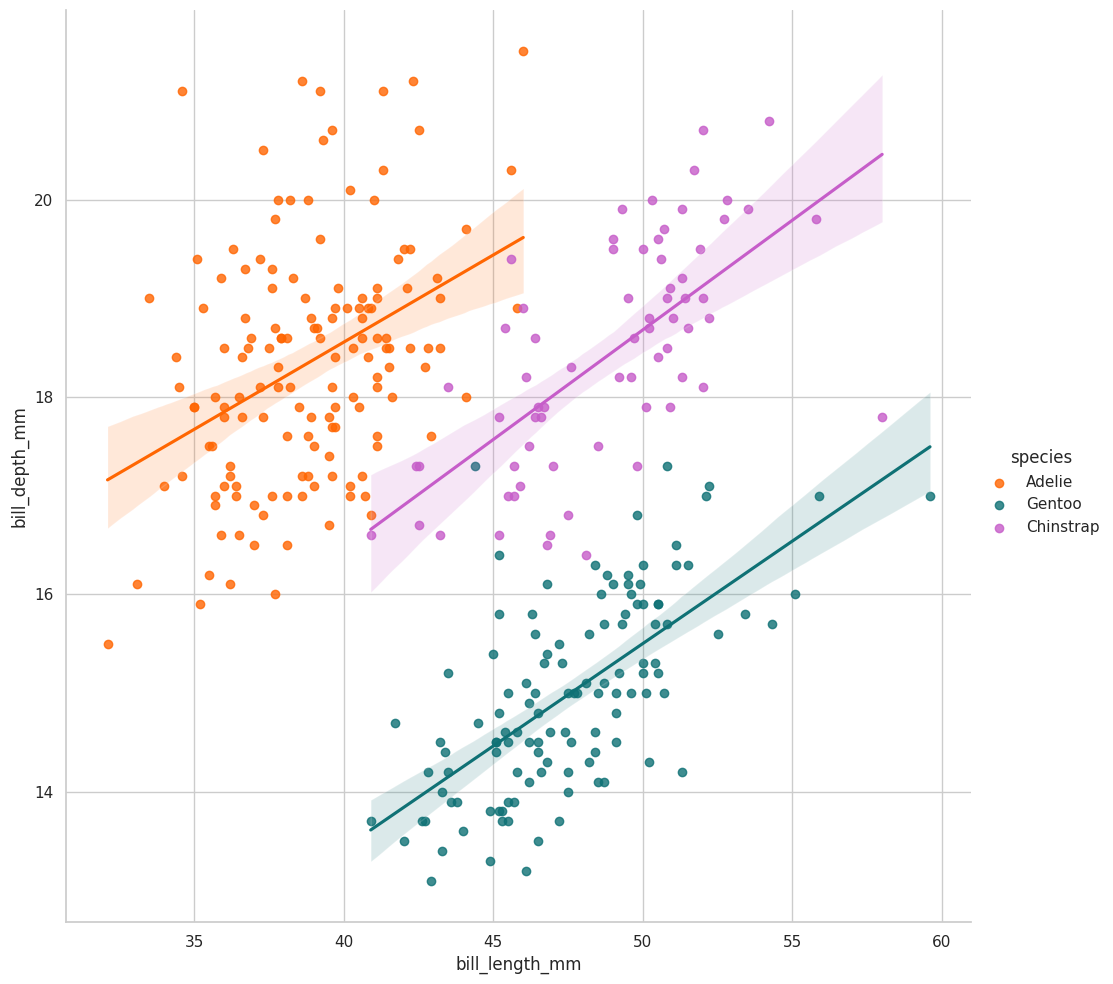

In [35]:
sns.lmplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    hue = 'species',
    palette=penguin_color,
    height=10
)